# 2장. 신경망

## 2.1 서론

- 주제: 인공 신경망, Neural Network
  - 머신러닝 $\rightarrow$ 학습규칙
  - 모델 $\rightarrow$ 신경망
  - ![](./images/02.nn.png)

- 2장은 단층 신경망을 위주로 학습
  - 다층 신경망은 3장에서 진행

### 2장 구성
- 2.2: 노드란?
- 2.3: 노드의 신호의 전달 과정
- 2.4: 신경망에 지도학습 적용
- 2.5, 2.6: 신경망의 학습 과정
- 2.7: 신경망 학습에 학습 데이터 운영 방식
- 2.8: 단층 신경망 구현
- 2.9: 단층 신경망의 한계
- 2.10: 요약

## 2.2 신경망 노드

- 뇌가 데이터를 저장하는 방식
  - 연결관계를 바꾸는 방식으로 저장
  - 별도의 저장 매체가 없음

|뇌|신경망|
|---|---|
|신경세포|뉴런|
|신경세포 연결|연결가중치|

- 3개의 입력을 받는 노드
  - x: 입력 정보, input
  - w: 가중치, weight
  - b: 편향, bias


![](./images/02.02.neuron.png)

- 외부에서 입력된 데이터는 가중치의 곱의 합으로 전달
- 가중치는 입력 데이터를 중요도를 결정
- Weighted sum
  - $v=w_1*x_1+w_2*x_2+w_3*x_3+b$
  - $v = WX + b$
  - W = $[w_1,w_2,w_3]$
  - X = $[x_1, w_2$, w_3$]^T$

### 활성함수 적용

- $y = \varphi(v)$
  - $\varphi(\cdot)$은 활성함수

### 신경망 노드 동작 방식 요약

#### 1. Weighted Sum

$$
\begin{align}
v & = w_1*x_1+w_2*x_2+w_3*x_3+b \\
& = WX+b 
\end{align}
$$

#### 2. 가중치로 외부 출력

$$
y = \varphi(v)=\varphi(WX+b)
$$

## 2.3 신경망의 계층 구조

- 입력층: 들어온 신호를 그대로 다음 노드에 전달
  - Weight Sum이나 Activation Function을 처리하지 않음
- 출력층
- 은닉층:입력층과 출력층 사이의 층 

![](./images/02.03.mpl.png)

- 단층신경망: 입력층과 출력층으로만 구성
- 다층신경망: 입력층과 출력층 사이에 은닉충이 존재
- 심층신경망: 은닉층이 2개이상인 다층신경망

- 단층 신경망
  - ![](./images/02.04.spl.png)
- 다층 신경망
  - ![](./images/02.05.dpl.png)
- 심층 신경망
  - ![](./images/02.06.mpl.png)

### 예제 1

![](./images/02.07.nn-ex01.png)
- activation function
  - $\varphi(x) = x$

#### example01 - phase 1 

![](./images/02.08.nn-ex01-1.png)

##### solution 1 by math

-  특정 노드에 적용되는 가중치를 컬럼 벡터로 만들어야 함
  - 편의상 입력 노드의 모든 가중치를 row 벡터로 등록하고
  - transpose함

![](./images/02.09.nn-ex01-3.png)

##### solution 1 by numpy

In [18]:
import numpy as np

def activation_func(x):
    return x

input = np.array([1, 2])
w_01 = np.array([[3, 2],[1,4]])
bias = 1

v = np.dot(w_01.T,input)+bias
h1_input = activation_func(v)
print("W_input", w_01)
print("h1_input", h1_input)

W_input [[3 2]
 [1 4]]
h1_input [ 6 11]


#### example01 - phase 2

![](./images/02.10.nn-ex01-4.png)

##### solution 1 by math

![](./images/02.10.nn-ex01-5.png)

In [21]:
import numpy as np

def activation_func(x):
    return x

h1_input = np.array([6, 11])
w_02 = np.array([[3, 5],[2,1]])
bias = 1

v = np.dot(w_02.T,h1_input)+bias
out = activation_func(v)
print("W_input", w_02)
print("h1_input", out)

W_input [[3 5]
 [2 1]]
h1_input [41 42]


### 활성함수로 선형삼수를 사용하지 말것

- 은닉층을 추가하는 효과를 상실
- ![](./images/02.10.nn-ex01-6.png)

- 활성함수를 선형함수로 사용할 경우 다음 네트워크는 동치
- 활성함수가 선형함수이면 hidden layer의 효과가 없음
- 활성함수는 출력노드에서는 사용 가능

![](./images/02.12.nn-ex01-8.png)

### w*x+b, w.T*b, x*w, ???

![](./images/02.28.png)

![](./images/02.27.shape.png)

## 2.4 신경망의 지도학습

### 신경망 지도학습 실행 절차
1. 가중치를 적절히 초기화
1. 데이터 중 입력 값을 확보하여 출력값과 정답과 비교하여 오차를 계산
1. 오차를 줄어들도록 신경망의 가중치를 조절
1. 전체 학습에서 2~3단계를 반복

![](./images/02.13.png)

## 2.5 단층 신경망 학습: 델타 규칙

- 신경망은 정보를 가중치 형태로 저장
- 새로운 정보를 학습시키면 가중치를 변경해야 함
- <font color='red'>__학습규칙__</font>
  - 정보에 맞춰 가중치를 체계적으로 변경하는 방법
  - 학습 규칙의 대표적인 사례
    - 델타규칙

![](./images/02.14_error_diagram.png)

- 델타 규칙의 원칙
  - 어떤 입력 노드가 출력 노드의 오차에 기여했다면
  - 두 노드의 연결 가중치는 입력 노드($x_j$)의 출력과 출력 노도($y_i$)의 오차($e_i$)에 비례해 조절

### 델타 규칙 공식

- $w_{ij} \rightarrow w_{ij} + \alpha e_i x_j$
  - $x_j$: 입력 노드 j의 출력 (j=1, 2, 3, 4)
  - $e_i$: 출력 노드 i의 출력 (i=1, 2, 3)
  - $w_{ij}$: 입력노드 j와 출력노드 i의 연결 가중치
  - $\alpha$: 학습룰 ($0<\alpha <= 0$)
    - 학습률이 크면: 수렴을 못함
    - 학습률이 작으면: 학습 속도 저하

![](./images/02.15.png)

- 델타 규칙 적용
  - $w_{11} \leftarrow w_{11} + \alpha e_1 x_1$
  - $w_{12} \leftarrow w_{12} + \alpha e_2 x_2$
  - $w_{13} \leftarrow w_{13} + \alpha e_3 x_3$

- <font color='red'>__$e_i x_j$__</font> 의미
  - 전체 오차에서 입력데이터가 차지하는 비율을 의미
  - 원칙적으로 입력데이터의 합으로 x_j르 나눠서 비율을 계산해야 함
  - 공식의 단순화를 위해서 비율화를 포기
  - 수식 단순화의 산물
  - 학습률에는 큰 변화가 없음

### 델타 규칙을 적용한 신경망 학습 과정

1. 신경망의 가중치를 적절한 값으로 초기화
1. 학습데이터에서 정답(레이블, $d_j$) 획득
1. 입력데이터로 부터 출력데이터 확보하고 오차 계산: $e_i=d_i-y_i$
1. 델타 규칙에 따라 가중치 계산: $\Delta w_{ij}=\alpha e_i x_j$
1. 신경망 업데이트
  - $w_{ij} \leftarrow w_{ij} + \Delta w_{ij}$
1. 2~5단계 반복

----
- 현재 델타 규칙은 Activation Function을 무시한 상태
- Activation Function의 효율을 적용해야 함

![](./images/02.16.png)

- 델타 규칙은 경사 하강법의 일종
  - 임의의 초기값으로 부터 단계적으로 정답을 찾아가는 과정

## 2.6 델타 규칙의 일반 형태

- 델타 규칙의 고도화
  - Activation function을 적용 함
  
|Version 1|Version 2|
|---|----|
|$w_{ij} \leftarrow w_{ij} + \alpha e_i x_j$|$w_{ij} \leftarrow w_{ij} + \alpha \delta_i x_j$|
|activation function의 고려사항 없음<br/>선형 함수를 activation function으로 사용|$\delta_i=\varphi'(v_i)e_i $ <br/>activation function의 순간 변화율을 반영함|

- $w_{ij} \leftarrow w_{ij} + \alpha \delta_i x_j$
- $\delta_i=\varphi'(v_i)e_i $
- 설명
  - $e_i$: 출력노드 i의 오차
  - $v_i$: 출력노드 i의 가중합
  - $\varphi'$: 출력노드 i의 활성함수인 $\varphi$의 도함수

----
- $\varphi'(v_i)$은 weighted sum에 대한  activation function의 미분계수임
- $\varphi'(v_i)$을 오차의 곱 의미
  - 오차에 weighted sum이 activation function에 대한 순간 변화율을 적용
  - 오차에 활성함수의 순간 변화율을 적용하여 비율화 함

----

- $\varphi'(x) = 1$인경우
 - $\delta_i = e_i$
 
$$
\begin{align}
w_{ij} & \leftarrow w_{ij} + \alpha \delta_i x_j \\
& \leftarrow w_{ij} + \alpha \varphi'(v_i) e_i x_j \\
& \leftarrow w_{ij} + \alpha * 1 * e_i x_j \\
& \leftarrow w_{ij} + \alpha e_i x_j \\
\end{align}
$$ 
 

### sigmoid 적용

#### 시그모이드 함수

$$\varphi(x) = \frac{1}{1+e^{-x}}$$

#### 함수 구현 및 도식

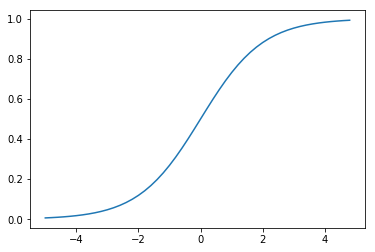

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x_data = np.arange(-5, 5, 0.2)
y_data = sigmoid(x_data)

plt.plot(x_data, y_data)
plt.show()

#### sigmoid 미분

![](./images/02.17.png)

### 델타규칙 적용

- $\varphi'(x)=\varphi(x)(1-\varphi(x))$
- $\delta_i=\varphi'(v_i)e_i$
- $\delta_i=\varphi(v_i)(1-\varphi(v_i))e_i$
- $w_{ij} \leftarrow w_{ij} + \alpha \varphi(v_i)(1-\varphi(v_i))e_ix_j$

### 델타규칙 유도

#### Sigmoid 함수 미분

![](./images/02.19_sigmoid.png)

#### Loss 함수 정의

![](./images/02.20_loss_function.png)

#### Loss Function 미분

![](./images/02.21_loss_function.png)

### 이론이 먼저인가 알고리즘이 먼저인가?

- 어떤 입력 노드가 출력 노드의 오차에 기여했다면, 두 노드의 연결 가충치는 해당 <font color="red">입력의 출력($x_j$)</font>과 <font color="red">출력 노드의 오차($e_i$)</font>에 비례하여 조절한다.
  - page: 50

$$
\begin{align}
w_{ij} & \leftarrow w_{ij} + \Delta w_{ij} \\
& \leftarrow w_{ij} + \alpha \delta_i x_j \\
& \leftarrow w_{ij} + \alpha \varphi'(v_i) e_i x_j \\
\end{align}
$$ 
 

## 2.7 SGD, Batch, Mini Batch

- 가중치를 갱신하는 방법 소개
  - stochastic 경사 하강법
  - batch
  - mini batch

### 2.7.1 stochastic 경사 하강법

- stochastic gradient descent, SDG
- 데이터 1건 마다 weight 갱신
- 단점: 신경망 성능의 변화폭이 매우 큼

$$\Delta w_{ij} = \alpha \delta_i x_j$$

### 2.7.2 배치

- 모든 학습 데이터에 관한 오차와 가중치 델타를 구한 후
- 평균값으로 가중치를 한번에 갱신
- 데이터 학습후 가중치 업데이트는 1회 발생

$$\Delta w_{ij} = \frac{1}{N}\sum_{k=1}^{N}{\Delta w_{ij}(k)}$$

- $\Delta w_{ij}(k)$ : K번째 가중치 델타
- N: 총데이터 건수


- 단점
  - 데이터가 많을 경우 가중치 업데이트가 오래 걸림
  - 가중치 갱신도 느림
  - 전체적인 학습 시간이 오래 걸림

### 2.7.3 미니배치

- SDG + Batch
- 데이터 100건
  - 임의로 20건을 골라 배치 방식으로 학습시킴
  - 전체 데이터를 학습하기 위해서는 5번의 mini-batch

----

- epoch
  - 전체 데이터를 모두 학습시킨 횟수

- epoch에 필요한 학습 횟수
  - SDG: N번
  - Batch: 1번
  - Mini-Batch: $\frac{N}{len(mini-batch)}$
    - N=All Data

## 2.8 예제: 델타규칙

- 3개의 입력 노드와 하나의 출력 노드로 구성된 신경망

![](./images/02.18.png)

- data set

In [82]:
import numpy as np
training_set = np.array([
    [0, 0, 1, 0],
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 1, 1]
])

$$
\begin{align}
\delta_i & = \varphi(v_i)(1-\varphi(v_i))e_i \\
\Delta W_{ij} & = \alpha\delta_ix_j \\
w_ij & \leftarrow w_ij + \Delta w_{ij}
\end{align}
$$

### 2.8.1 SGD 방식 구현

#### using numpy

![](./images/02.22_sdg_nn_diagram.png)

$$
\begin{align}
\delta_i & = \varphi(v_i)(1-\varphi(v_i))e_i \\
\Delta W_{ij} & = \alpha\delta_ix_j \\
w_ij & \leftarrow w_ij + \Delta w_{ij}
\end{align}
$$

In [144]:
import numpy as np

class SGDNN:
    def __init__(self, input_node, output_node, 
                learning_rate, epoch):
        self._input_node = input_node
        self._output_node = output_node
        self._learning_rate = learning_rate
        self._epoch = epoch
        self._w_input = np.random.uniform(size=(input_node, output_node))
        pass
    
    def _sigmoid(self, x):
        return 1.0/(1.0+np.exp(-x))

    def _d_sigmoid(self, x):
        return sigmoid(x)*(1-sigmoid(x))

    def _delta(self, y, error):
        return d_sigmoid(y)*error
    
    def train(self, input_data, targets):
        for _ in range(self._epoch):
            for input, target in zip(input_data, targets): 
                x = input.reshape([-1, 1])
                h = np.dot(self._w_input.T, x) # W.T * X
                y = self._sigmoid(h)           # output 
                e = target - y                      # error
                delta_w = self._learning_rate*self._delta(y, e)*x
                #print(delta_w)
                self._w_input += delta_w
        pass
    
    
    def predict(self, input):
        x = np.array(input).reshape([-1,1])
        h = np.dot(self._w_input.T, x) # W.T * X
        y = self._sigmoid(h)
        return y

In [145]:
## training data
training_set = np.array([
    [0, 0, 1, 0],
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 1, 1]
])

input_data = training_set[:, :3]
targets = training_set[:, [-1]]

n = SGDNN(3, 1, 0.05, 1000)
n.train(input_data, targets)

print(n.predict([0,0,1]))
print(n.predict([0,1,1]))
print(n.predict([1,0,1]))
print(n.predict([1,1,1]))


[[ 0.1454251]]
[[ 0.09369826]]
[[ 0.92657535]]
[[ 0.88461581]]


### 2.8.2 Batch 방식 구현

#### using numpy

In [224]:
import numpy as np

class BatchNN:
    def __init__(self, input_node, output_node, 
                learning_rate, epoch):
        self._input_node = input_node
        self._output_node = output_node
        self._learning_rate = learning_rate
        self._epoch = epoch
        self._w_input = np.random.uniform(size=(input_node, output_node))
        pass
    
    def _sigmoid(self, x):
        return 1.0/(1.0+np.exp(-x))

    def _d_sigmoid(self, x):
        return sigmoid(x)*(1-sigmoid(x))

    def _delta(self, Y, E):
        return d_sigmoid(Y)*E
    
    def train(self, input_data, targets):
        for _ in range(self._epoch):
            X = input_data.T               # (3, 4)
            H = np.dot(self._w_input.T, X) # W.T * X : W(1, 3) X(3, 4) ==> (1, 4)
            Y = self._sigmoid(H.T)         # Y (4,1)
            E = targets - Y                # error  (4,1)
            #print(self._delta(Y, E).shape,self._delta(Y, E) )
            delta_w = self._learning_rate*self._delta(Y, E)*X.T
            #print(delta_w.shape)
            avg_delta_w = np.mean(delta_w, axis=0) #(1, 3)
            #print(self._w_input)
            self._w_input += avg_delta_w.reshape(-1, 1)
            #print(self._w_input)
        pass
    
    
    def predict(self, input):
        x = np.array(input).reshape([-1,1])
        h = np.dot(self._w_input.T, x) # W.T * X
        y = self._sigmoid(h)
        return y

![](./images/02.23_batch_diagram.png)

![](./images/02.24_batch_transpomation.png)

### 2.8.3 mini-batch 구현방식

#### using numpy

In [253]:
import numpy as np

class MiniBatchNN:
    def __init__(self, input_node, output_node, 
                learning_rate, epoch):
        self._input_node = input_node
        self._output_node = output_node
        self._learning_rate = learning_rate
        self._epoch = epoch
        self._w_input = np.random.uniform(size=(input_node, output_node))
        pass
    
    def _sigmoid(self, x):
        return 1.0/(1.0+np.exp(-x))

    def _d_sigmoid(self, x):
        return sigmoid(x)*(1-sigmoid(x))

    def _delta(self, Y, E):
        return d_sigmoid(Y)*E
    
    def _update_weight(self, input_data, targets):
        X = input_data.T               # (3, 4)
        H = np.dot(self._w_input.T, X) # W.T * X : W(1, 3) X(3, 4) ==> (1, 4)
        Y = self._sigmoid(H.T)         # Y (4,1)
        E = targets - Y                # error  (4,1)
        #print(self._delta(Y, E).shape,self._delta(Y, E) )
        delta_w = self._learning_rate*self._delta(Y, E)*X.T
        #print(delta_w.shape)
        avg_delta_w = np.mean(delta_w, axis=0) #(1, 3)
        #print(self._w_input)
        self._w_input += avg_delta_w.reshape(-1, 1)
        #print(self._w_input)
        pass


    def train(self, input_data, targets, mini_batch):
        for _ in range(self._epoch):
            splited_data = np.array_split(input_data, int(len(input_data)/mini_batch))
            spiited_targets = np.array_split(targets, int(len(targets)/mini_batch))
            for arr_data, arr_target in zip(splited_data, spiited_targets):
                self._update_weight(arr_data, arr_target)
        pass
    
    
    def predict(self, input):
        x = np.array(input).reshape([-1,1])
        h = np.dot(self._w_input.T, x) # W.T * X
        y = self._sigmoid(h)
        return y

In [259]:
## training data
training_set = np.array([
    [0, 0, 1, 0],
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 1, 1]
])

input_data = training_set[:, :3]
targets = training_set[:, [-1]]

n = MiniBatchNN(3, 1, 0.05, 10000)
#n = BatchNN(3, 1, 0.05, 1)
n.train(input_data, targets, 2)

print(n.predict([0,0,1]))
print(n.predict([0,1,1]))
print(n.predict([1,0,1]))
print(n.predict([1,1,1]))

[[ 0.02979768]]
[[ 0.01973486]]
[[ 0.98352295]]
[[ 0.97507906]]


### Tenforflow example

In [292]:
import tensorflow as tf

tf.set_random_seed(777) 

training_set = np.array([
    [0., 0., 1., 0.],
    [0., 1., 1., 0.],
    [1., 0., 1., 1.],
    [1., 1., 1., 1.]
])

x_data = training_set[:, :3]
y_data = training_set[:, [-1]]

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

input_count = 3
output_count = 1
W = tf.Variable(tf.random_normal([input_count, output_count]))

hypothesis = tf.matmul(X, W)
cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    
    for epoch in range(10000):
        _, c = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
        if epoch % 100000 == 0 :
            print(c)
    print(sess.run(hypothesis, feed_dict={X:x_data}))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
2.8106
[[  2.92065079e-06]
 [  2.92062691e-06]
 [  9.99997079e-01]
 [  9.99997079e-01]]


![](./images/02.26.tensorflow.png)

### Numpy vs Tensorflow

![](./images/02.29.png)

## 2.9 단층 신경망의 한계

- 단층이 한계는 다층으로 극복 가능

### xor 문제

In [257]:
## training data
training_set = np.array([
    [0, 0, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 1],
    [1, 1, 1, 0]
])

input_data = training_set[:, :3]
targets = training_set[:, [-1]]

n = SGDNN(3, 1, 0.05, 100000)
n.train(input_data, targets)

print(n.predict([0,0,1]))
print(n.predict([0,1,1]))
print(n.predict([1,0,1]))
print(n.predict([1,1,1]))

[[ 0.50165401]]
[[ 0.50018098]]
[[ 0.49870795]]
[[ 0.49723494]]


- 확률적으로 판별 불가
  - 선형 분리 불가능
  - linearly inseparable

![](./images/02.25.xor.png)

- 단층 신경망은 선형 분리 가느한 문제만 적용 가능

$$\varphi(v) = \varphi(Wx+b)$$

## 2.10 요약